In [1]:
import numpy as np
from numpy import pi as pi
#%matplotlib notebook
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import sympy as sp

import raschii


/home/anna/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


-0.84998219866604 1.15


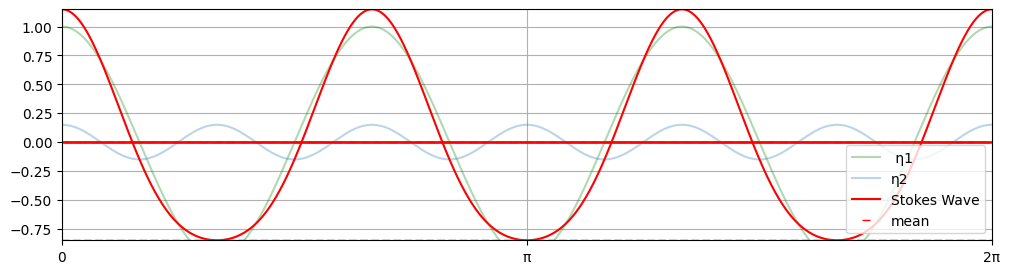

In [2]:
def plot_Stoke_waves(A, k, omega, phi, epsilon, t_0 = 0):
    '''
    A = 1.0  # Amplitude of the wave
    k = 3.0  # Wave number
    omega = 0.5  # Angular frequency
    #phi = np.pi/4  # Phase angle (45 degrees in radians)
    phi = 0
    t_0 = 0
    epsilon = 0.1
    '''
    chi = lambda k, omega, x, t, phi: k*x-omega*t - phi
    
    x = np.linspace(0, 2*np.pi, 1000)
    y0 = np.zeros(len(x))
    eta_1st_order = lambda A, k, omega, x, t_0, phi: A* np.cos(chi(k,omega,x,t_0, phi))
    eta_2nd_order = lambda A, k, omega, x, t_0, phi: 0.5 * k * epsilon * A**2 *  np.cos( 2* chi(k,omega,x,t_0, phi))
    stokes_wave_data = np.array(eta_2nd_order(A, k, omega, x, t_0, phi) + eta_1st_order(A, k, omega, x, t_0, phi))
    
    # Stokes wave equation
    #y = A * np.cos(k * t - omega * t + phi) - 0.5 * k * epsilon * A**2 * np.cos(2 * omega * t + 2 * phi)
    
    # Plot the Stokes wave
    fig, ax = plt.subplots(figsize = (12,3))
    ax.set_xlim(0,2*pi)
    print(stokes_wave_data.min(), stokes_wave_data.max())
    ax.set_ylim(stokes_wave_data.min(), stokes_wave_data.max())
    ax.grid()
    #ax.axis('equal')
    alpha = 0.3
    ax.set_xticks(np.arange(0, 3*pi, pi))
    ax.set_xticklabels(("0", r"π", r"2π"))
 
    
    ax.plot(x, eta_1st_order(A, k, omega, x, t_0, phi), color = 'green', label = " η1", alpha = alpha)
    ax.plot(x, eta_2nd_order(A, k, omega, x, t_0, phi), label = 'η2', alpha = alpha)
    ax.plot(x, y0, '--', color = 'red', alpha = alpha)
    ax.plot(x, stokes_wave_data, label='Stokes Wave', color = 'red')
    ax.plot(x, np.full(len(stokes_wave_data), stokes_wave_data.min()), '--', color = 'grey', alpha = alpha)
    ax.plot(x, np.full(len(stokes_wave_data), stokes_wave_data.max()), '--', color = 'grey', alpha = alpha)
    ax.plot(x, np.full(len(stokes_wave_data), stokes_wave_data.mean()), '_', color = 'red', label = 'mean')
    _= ax.legend(loc='lower right')

plot_Stoke_waves(A = 1, k = 3, omega = 0.5, phi = 0, epsilon = 0.1)

-0.005972137000337345 0.00602782107


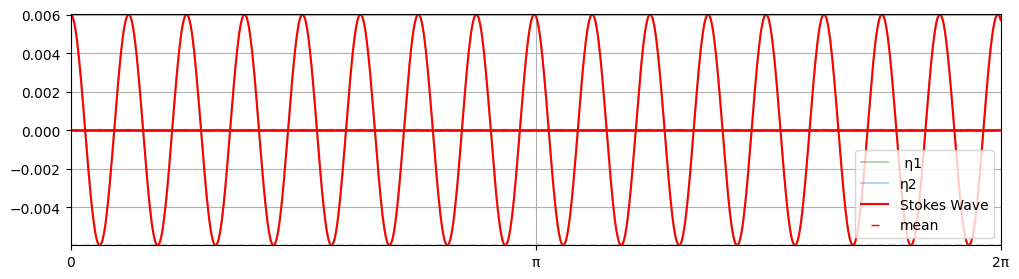

In [3]:
A = 0.006
k = 16.05
plot_Stoke_waves(A = A, k = k , omega = 2 * np.pi * 2, phi = 0, epsilon = A*k)

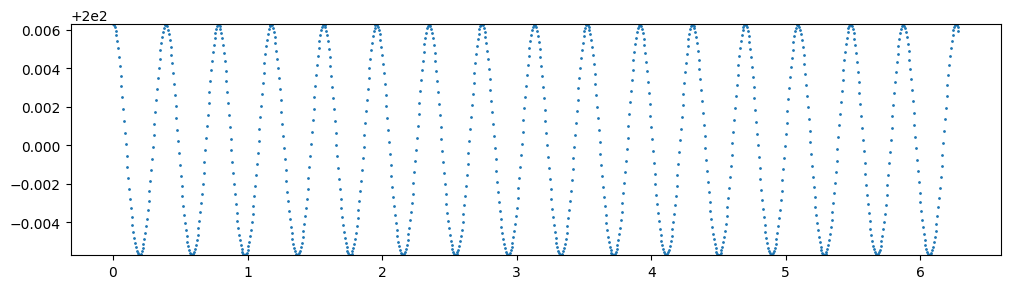

In [4]:
plt.figure(figsize=(12, 3))
A = 0.006
k = 16.05 
wave = raschii.StokesWave(height=2*A, depth=200, length=2*np.pi / k , N=2)
x = np.linspace(0, 2*np.pi, 1000)
eta = wave.surface_elevation(x=x)
plt.ylim(eta.min(), eta.max())
_ = plt.scatter(x,eta, s = 1)

* depth: still water distance from the flat sea bottom to the surface

In [5]:
eta

array([200.0062889 , 200.00625249, 200.0061438 , 200.00596447,
       200.00571719, 200.00540562, 200.00503432, 200.00460868,
       200.00413474, 200.00361909, 200.00306873, 200.00249094,
       200.00189311, 200.00128263, 200.00066673, 200.0000524 ,
       199.99944628, 199.99885455, 199.99828292, 199.99773651,
       199.99721991, 199.99673711, 199.99629153, 199.99588606,
       199.99552308, 199.99520452, 199.99493189, 199.99470637,
       199.99452882, 199.99439987, 199.99431993, 199.99428926,
       199.99430795, 199.99437592, 199.99449299, 199.99465878,
       199.99487272, 199.995134  , 199.99544152, 199.99579387,
       199.99618922, 199.99662529, 199.99709935, 199.99760808,
       199.99814764, 199.9987136 , 199.99930094, 199.99990412,
       200.00051705, 200.00113319, 200.00174565, 200.00234723,
       200.00293058, 200.00348827, 200.00401302, 200.00449772,
       200.00493568, 200.0053207 , 200.00564723, 200.00591051,
       200.00610664, 200.00623268, 200.00628675, 200.00

-0.75 1.5


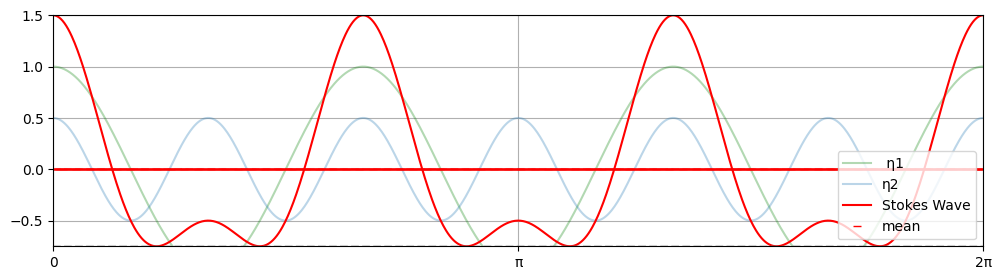

In [6]:
plot_Stoke_waves(A = 1, k = 3, omega = 0.5, phi = 0, epsilon = 1/3)

2.0943951023931953


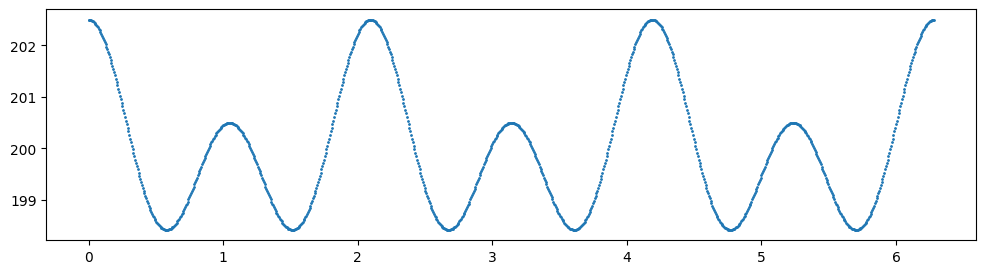

In [7]:

k = 3
A = 1
omega = 0.5
length=2*np.pi / k
print(length)
#lenght/lambda = 2 * pi * k (wave number)
plt.figure(figsize=(12, 3))
wave = raschii.StokesWave(height=2*A, depth=200, length=2*np.pi / k , N=2)
x = np.linspace(0, 2*np.pi, 1000)
eta = wave.surface_elevation(x=x)
_ = plt.scatter(x,eta, s = 1)

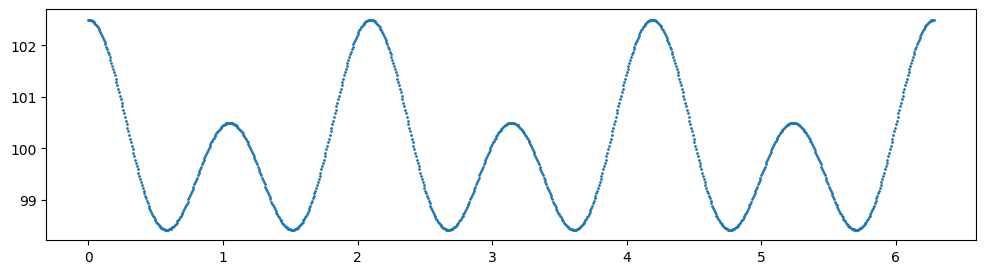

In [8]:
plt.figure(figsize=(12, 3))
wave = raschii.StokesWave(height=2*A, depth=100, length=2*np.pi / k , N=2)
x = np.linspace(0, 2*np.pi, 1000)
eta = wave.surface_elevation(x=x)
_ = plt.scatter(x,eta, s = 1)

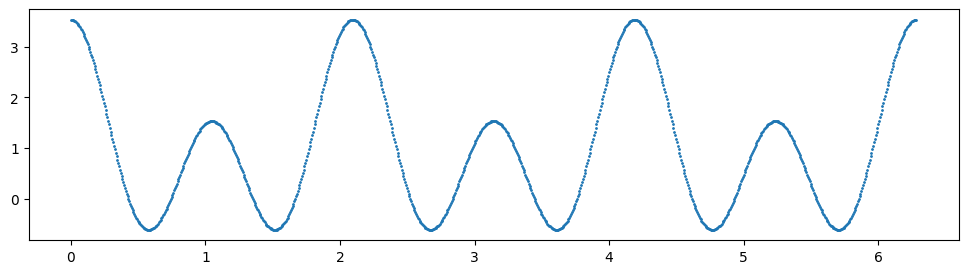

In [9]:
plt.figure(figsize=(12, 3))
wave = raschii.StokesWave(height=2*A, depth=1, length=2*np.pi / k , N=2)
x = np.linspace(0, 2*np.pi, 1000)
eta = wave.surface_elevation(x=x)
_ = plt.scatter(x,eta, s = 1)

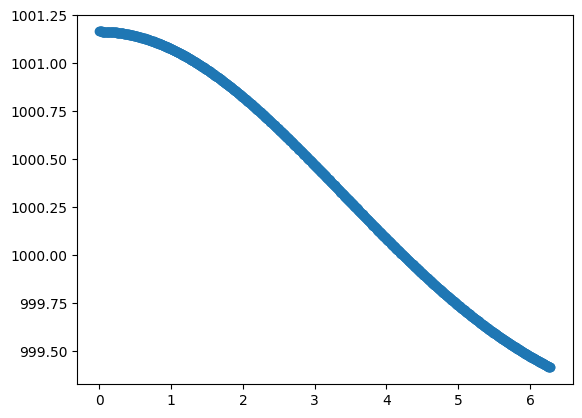

In [10]:
import raschii
k = 3
A = 1
omega = 0.5
#lenght/lambda = 2 * pi * k (wave number)
wave = raschii.StokesWave(height=2*A, depth=1000, length=2*np.pi * k , N=2)
x = np.linspace(0, 2*np.pi, 1000)
eta = wave.surface_elevation(x=x)
plt.scatter(x,eta)